# <div align="center" style="color: #ff5733;">Data For Anti-Fraud</div>

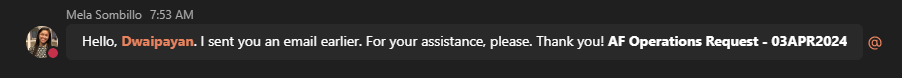

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

In [2]:
dfr = pd.read_excel(r"D:\OneDrive - Tonik Financial Pte Ltd\MyStuff\Mela Sombillo csombillo1@tonikbank.com\Anti-Fraud Ops Request 03April24\AF Operations Request - 03APR2024.xlsx", sheet_name='Sheet1')
print(f"The rows and columns in dfr are:\t {dfr.shape}")

The rows and columns in dfr are:	 (1577, 5)


In [3]:
pd.set_option("Display.max_columns", None)
dfr.head()

,TSA,Transaction Amt.,Transaction Date,Source Account Number,Beneficiary Account Number
0,60810223040002,NaN,NaN,NaN,NaN
1,60815996650007,NaN,NaN,NaN,NaN
2,60811870140001,NaN,NaN,NaN,NaN
3,60813779710004,NaN,NaN,NaN,NaN
4,60810368440006,NaN,NaN,NaN,NaN


In [4]:
# Check the columns
dfr.columns

Index(['TSA', 'Transaction Amt.', 'Transaction Date', 'Source Account Number',
       'Beneficiary Account Number'],
      dtype='object')

In [5]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TSA                         1577 non-null   int64  
 1   Transaction Amt.            0 non-null      float64
 2   Transaction Date            0 non-null      float64
 3   Source Account Number       0 non-null      float64
 4   Beneficiary Account Number  0 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 61.7 KB


In [10]:
dfr['TSA'] = dfr['TSA'].astype(str)

In [11]:
a = tuple(dfr['TSA'])
a[0:5]

('60810223040002',
 '60815996650007',
 '60811870140001',
 '60813779710004',
 '60810368440006')

In [15]:
sq = f"""SELECT
  tsaaccountnumber,
  cust_id Party_id,
  from_account_no,
  from_bank_name,
  to_account_no,
  to_bank_name,
  txn_ts,
  status,
  trx_amount,
  trx_fee_amount,
  total_trx_amount,
  trx_type,
  transfer_description
FROM
  `prj-prod-dataplatform.risk_credit_mis.tsa_payment_transaction_success`
WHERE
  date_trunc(txn_ts, day) between '2024-01-01' and '2024-03-31'
AND
  tsaaccountnumber in {a} 
ORDER BY tsaaccountnumber ,
      txn_ts desc

"""
print(sq)

SELECT
  tsaaccountnumber,
  cust_id Party_id,
  from_account_no,
  from_bank_name,
  to_account_no,
  to_bank_name,
  txn_ts,
  status,
  trx_amount,
  trx_fee_amount,
  total_trx_amount,
  trx_type,
  transfer_description
FROM
  `prj-prod-dataplatform.risk_credit_mis.tsa_payment_transaction_success`
WHERE
  date_trunc(txn_ts, day) between '2024-01-01' and '2024-03-31'
AND
  tsaaccountnumber in ('60810223040002', '60815996650007', '60811870140001', '60813779710004', '60810368440006', '60810715230002', '60810014130002', '60810091320008', '60812290380003', '60810427020002', '60811840060009', '60810274390006', '60810554540002', '60812430270006', '60819486040009', '60810203230007', '60814227990001', '60823524960005', '60811829820001', '60822431010006', '60823432960008', '60814302870009', '60810190390007', '60813014130001', '60812062380007', '60811284910001', '60812292490002', '60810282930001', '60811814600005', '60810308950003', '60810234230002', '60810062010002', '60810295320001', '60812

In [16]:
df = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID 968630bb-5ca3-492f-b4d6-7f4cca6d7a2c successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [17]:
print(f"The shape of the df are:\t{df.shape}")

The shape of the df are:	(68761, 13)


In [ ]:
df.to_excel("Anti-Fraud Ops Request 3rdMarch2024_TSA_Transactions.xlsx", sheet_name='rawdata', index = False)